In [9]:
import sympy as sp
import math

![](images/im2.png)

In [10]:
p_y = sp.symbols("p_y")

P_X = [0.3,0.1,0.25,0.15]
# Y = {y1, ... ,y_m}: P(y_i)=P(y_j)=p_y V i,j = 1,m

def entropy(P):
    return sum(-p*math.log2(p) for p in P)

# m - ?

In [27]:
#H(X)
entropy(P_X)

1.763827326863529

In [32]:
# entropy(P_Y) = log2(m)   (max. entropy)
# => log2(m) = entropy(P_X), m = 2^(entropy(P_X))
m = round(math.pow(2,entropy(P_X)))
m

3

In [34]:
# H(Y)
entropy([1/m for i in range(m)])

1.584962500721156

![](images/im3.png)

In [50]:
def rle(bits):
    out=list()
    next_lst=[None,None]
    max_num=None
    for b in bits:
        if next_lst[0] is None:
            next_lst[0]=b
            next_lst[1]=1
            max_num=1
            continue
        if next_lst[0]==b:
            next_lst[1]+=1
            continue
        out.append(tuple(next_lst))
        if max_num is None:
            max_sum=next_lst[1]
        else:
            max_num=max(max_num,next_lst[1])
        next_lst=[b,1]
    out.append(tuple(next_lst))
    numeric_bits=math.ceil(math.log2(max_num))
    res = ""
    for x in out:
        binary=bin(x[1])[2:]
        if len(binary)<numeric_bits:
            binary="0"*(numeric_bits-len(binary))+binary
        res+=str(x[0])
        res+=binary
    
    return out,res

nums=[0]*20 + [1]*5 + [0]*23 + [1]*30 + [0]*22
print("bits =","".join(map(str,nums)))
out,encoded=rle(nums)
print("RLE(nums) =",encoded)
print("Compression ratio:",len(nums)/len(encoded))

bits = 0000000000000000000011111000000000000000000000001111111111111111111111111111110000000000000000000000
RLE(nums) = 010100100101010111111110010110
Compression ratio: 3.3333333333333335


![](images/im4.png)

In [72]:
def num_to_bits(num, length):
    binary=bin(num)[2:]
    if len(binary)<length:
        binary="0"*(length-len(binary))+binary
    return binary
    
def lz77(bits,include_spaces=False):
    words=set()
    current_word=None
    for x in bits:
        if current_word is None:
            current_word=str(x)
            continue
        if not current_word in words:
            words.add(current_word)
            current_word=str(x)
            continue
        current_word+=str(x)
        
    words_count=len(words)
    bits_count=math.ceil(math.log2(words_count))
    
    words=dict()
    current_word=None
    
    encoded=""
    index=1
    def f(current_word):
        nonlocal encoded,bits_count,include_spaces
        if len(current_word)==1:
            encoded+=num_to_bits(0,bits_count)
            if include_spaces: encoded+=" "
            encoded+=current_word
            if include_spaces: encoded+="  "
        else:
            last_index=words[current_word[:-1]]
            encoded+=num_to_bits(last_index,bits_count)
            if include_spaces: encoded+=" "
            encoded+=current_word[len(current_word)-1]
            if include_spaces: encoded+="  "
    for x in bits:
        if current_word is None:
            current_word=str(x)
            continue
        if not current_word in words:
            f(current_word)
            words[current_word]=index
            index+=1
            current_word=str(x)
            continue
        current_word+=str(x)
    
    f(current_word)
    return encoded
    

![](images/im8.png)

In [75]:
nums=[1,0,1,0,1,1,0,1,1,0,1,0,1,0,1,0,1,1]
enc1=lz77(nums,include_spaces=True)
print("test:")
print("encoded bits (with spaces): %s"%enc1)
enc1=lz77(nums,include_spaces=False)
print("encoded bits: %s"%enc1)

test:
encoded bits (with spaces): 000 1  000 0  001 0  001 1  010 1  011 1  101 0  110 1  
encoded bits: 00010000001000110101011110101101


![](images/im4.png)

In [92]:
S = [
    0,1,0,0,1,1,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,1,0,1,1,0,0,1,1,0,0,0,0,
]
encoded = lz77(S,include_spaces=True)
print("encoded bits with spaces: \n%s\n"%encoded)
encoded = lz77(S,include_spaces=False)
print("encoded bits: %s\n"%encoded)

print("compression ratio:",len(S)/len(encoded))
print("(lz77 does not compress the input bits)")

encoded bits with spaces: 
0000 0  0000 1  0001 0  0010 1  0100 1  0011 1  0001 1  0011 0  0110 0  0010 0  1010 1  1010 0  0100 0  0011 0  

encoded bits: 0000000001000100010101001001110001100110011000010010101101000100000110

compression ratio: 0.5
(lz77 does not compress the input bits)


![](images/im5.png)

In [191]:
P_X = [0,35,0.25,0.2,0.15,0.05]

class Node:
    def __init__(self,name,value):
        self.name=name
        self.value=value
    def __hash__(self):
        return self.name.__hash__()
    def __str__(self):
        return self.name+"\n"+str(self.value)
    def __eq__(self,other):
        if isinstance(other,str):
            return self.name==other
        return self.name==other.name
    def __add__(self,other):
        return Node(self.name+","+other.name,round(self.value+other.value,2))
    def __iter__(self):
        return self.name.__iter__()



In [230]:
import networkx as nx
import matplotlib.pyplot as plt

x1=Node("x1",0.35)
x2=Node("x2",0.25)
x3=Node("x3",0.20)
x4=Node("x4",0.15)
x5=Node("x5",0.05)
x3x4x5=x3+x4+x5
print(x3x4x5)
x3x4x5x1x2=x3x4x5+x1+x2
print(x3x4x5x1x2)

edge_labels={
    (x3x4x5x1x2,x3x4x5):"1",
    (x3x4x5x1x2,x1):"2",
    (x3x4x5x1x2,x2):"3",
    (x3x4x5,x3):"1",
    (x3x4x5,x4):"2",
    (x3x4x5,x5):"3",    
}

G = nx.DiGraph({
    x1:[x3x4x5x1x2],
    x2:[x3x4x5x1x2],
    x3:[x3x4x5],
    x4:[x3x4x5],
    x5:[x3x4x5],
    x3x4x5:[x3x4x5x1x2]
})

x3,x4,x5
0.4
x3,x4,x5,x1,x2
1.0


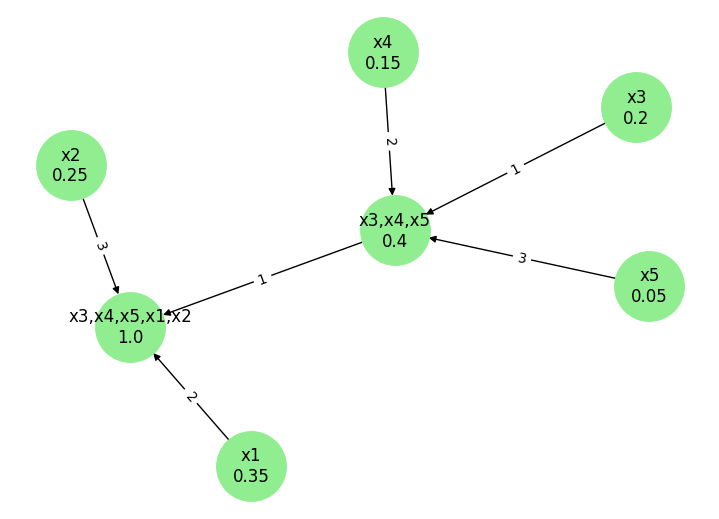

In [232]:
rcParams['figure.figsize'] = 7, 5
pos = nx.spring_layout(G)
nx.draw(G,pos,
        node_color='lightgreen', 
        node_size=2500,
        with_labels=True, 
        arrows=True,
        )
nx.draw_networkx_edge_labels(G,pos, edge_labels=edge_labels)
plt.show()

Huffman method encoded values:
- x1 -> 2
- x2 -> 3
- x3 -> 11
- x4 -> 12
- x5 -> 13

![](images/im6.png)

![](images/im7.png)

In [239]:
P_X = [0.34,0.46,0.16,0.04]
t = 0.2 # ms
H = entropy(P_X)
t_s = 0.2/1000 # s
# Y = X (шум відсутній)
# H(Y|X) = 0
# H(Y) = H(X)
#=> V = H(X)/t
V = H / t_s # bit / s

# C = 1/t * (log2(|X|) - H(Y|X)) = | H(Y|X) = 0 | = 1/t*log2(|X|)
C = 1/t_s*math.log2(len(P_X))

print("Пропускна здатність: %s bit/s"%C)
print("Швидкість передачі інформації: %s bit/s"%V)

Пропускна здатність: 10000.0 bit/s
Швидкість передачі інформації: 8266.401619816917 bit/s
